## Analysis of a coarse-grained trajectory: density maps, aspect ratio, 

#### In this notebook we will learn how to calculate the density distribution of an amphiphilic coarse grained peptide that self-assembles to form a fiber. 

In [113]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import math
import nglview as nv
import MDAnalysis as mda
from MDAnalysis.lib import distances 
from MDAnalysis.analysis.lineardensity import LinearDensity
from MDAnalysis.transformations import center_in_box
from MDAnalysis.lib.mdamath import make_whole
#density profile of fiber - in cylindrical coordinates!
#rdfs
#MDAnalysis.analysis.density.density_from_Universe
from MDAnalysis.analysis import rdf


In [6]:
u = mda.Universe('126chains.psf', '126chains.dcd')

In [7]:
poly = u.atoms.select_atoms('not name W and not name CL and not name NA')

In [174]:
w = u.atoms.select_atoms('name W')

In [175]:
POLY = nv.show_mdanalysis(poly)
POLY

NGLWidget(count=2221)

In [15]:
AAA=poly.atoms.select_atoms('resname AAA')
BBB=poly.atoms.select_atoms('resname BBB')
CCC=poly.atoms.select_atoms('resname CCC')
DDD=poly.atoms.select_atoms('resname DDD')

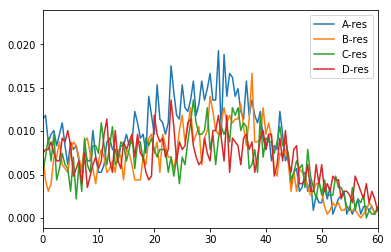

In [40]:
Wdens = LinearDensity(w, binsize=0.5, start=0, stop=5)
Wdens.run()
Adens = LinearDensity(AAA, binsize=0.5, start=0, stop=5)
Adens.run()
Bdens = LinearDensity(BBB, binsize=0.5, start=0, stop=5)
Bdens.run()
Cdens = LinearDensity(CCC, binsize=0.5, start=0, stop=5)
Cdens.run()
Ddens = LinearDensity(DDD, binsize=0.5, start=0, stop=5)
Ddens.run()
Adens_xy = 0.5*(Adens.results['x']['pos']+ Adens.results['y']['pos'])
Bdens_xy = 0.5*(Bdens.results['x']['pos']+ Bdens.results['y']['pos'])
Cdens_xy = 0.5*(Cdens.results['x']['pos']+ Cdens.results['y']['pos'])
Ddens_xy = 0.5*(Ddens.results['x']['pos']+ Ddens.results['y']['pos'])
Wdens_xy = 0.5*(Wdens.results['x']['pos']+ Wdens.results['y']['pos'])

x=np.arange(0,AAA.dimensions[1], 0.5)
fig, ax = plt.subplots()
ax.plot(x, Adens_xy, label='A-res')
ax.plot(x, Bdens_xy, label='B-res')
ax.plot(x, Cdens_xy, label='C-res')
ax.plot(x, Ddens_xy, label='D-res')
#ax.plot(x, Wdens_xy, label='water')
plt.legend()
plt.xlim([0,60])
plt.show()

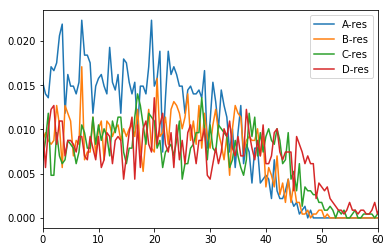

In [66]:
Wdens = LinearDensity(w, binsize=0.5, start=5, stop=10)
Wdens.run()
Adens = LinearDensity(AAA, binsize=0.5, start=5, stop=10)
Adens.run()
Bdens = LinearDensity(BBB, binsize=0.5, start=5, stop=10)
Bdens.run()
Cdens = LinearDensity(CCC, binsize=0.5, start=5, stop=10)
Cdens.run()
Ddens = LinearDensity(DDD, binsize=0.5, start=5, stop=10)
Ddens.run()
Adens_xy = 0.5*(Adens.results['x']['pos']+ Adens.results['y']['pos'])
Bdens_xy = 0.5*(Bdens.results['x']['pos']+ Bdens.results['y']['pos'])
Cdens_xy = 0.5*(Cdens.results['x']['pos']+ Cdens.results['y']['pos'])
Ddens_xy = 0.5*(Ddens.results['x']['pos']+ Ddens.results['y']['pos'])
Wdens_xy = 0.5*(Wdens.results['x']['pos']+ Wdens.results['y']['pos'])
x=np.arange(0,AAA.dimensions[1], 0.5)
fig, ax = plt.subplots()
ax.plot(x, Adens_xy, label='A-res')
ax.plot(x, Bdens_xy, label='B-res')
ax.plot(x, Cdens_xy, label='C-res')
ax.plot(x, Ddens_xy, label='D-res')
#ax.plot(x, Wdens_xy, label='water')
plt.legend()
plt.xlim([0,60])
plt.show()

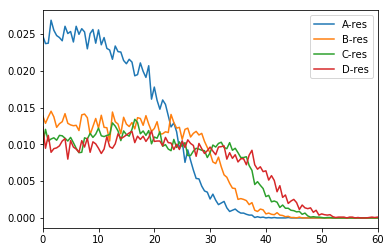

In [67]:
Wdens = LinearDensity(w, binsize=0.5, start=10, stop=50)
Wdens.run()
Adens = LinearDensity(AAA, binsize=0.5, start=10, stop=50)
Adens.run()
Bdens = LinearDensity(BBB, binsize=0.5, start=10, stop=50)
Bdens.run()
Cdens = LinearDensity(CCC, binsize=0.5, start=10, stop=50)
Cdens.run()
Ddens = LinearDensity(DDD, binsize=0.5, start=10, stop=50)
Ddens.run()

Adens_xy = 0.5*(Adens.results['x']['pos']+ Adens.results['y']['pos'])
Bdens_xy = 0.5*(Bdens.results['x']['pos']+ Bdens.results['y']['pos'])
Cdens_xy = 0.5*(Cdens.results['x']['pos']+ Cdens.results['y']['pos'])
Ddens_xy = 0.5*(Ddens.results['x']['pos']+ Ddens.results['y']['pos'])
Wdens_xy = 0.5*(Wdens.results['x']['pos']+ Wdens.results['y']['pos'])

x=np.arange(0,AAA.dimensions[1], 0.5)
fig, ax = plt.subplots()
ax.plot(x, Adens_xy, label='A-res')
ax.plot(x, Bdens_xy, label='B-res')
ax.plot(x, Cdens_xy, label='C-res')
ax.plot(x, Ddens_xy, label='D-res')
#ax.plot(x, Wdens_xy, label='water')
plt.legend()
plt.xlim([0,60])
plt.show()

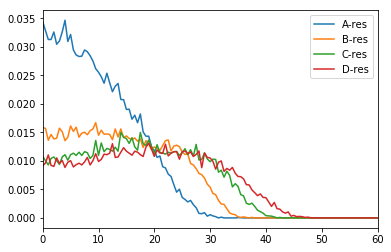

In [68]:
Wdens = LinearDensity(w, binsize=0.5, start=50, stop=100)
Wdens.run()
Adens = LinearDensity(AAA, binsize=0.5, start=50, stop=100)
Adens.run()
Bdens = LinearDensity(BBB, binsize=0.5, start=50, stop=100)
Bdens.run()
Cdens = LinearDensity(CCC, binsize=0.5, start=50, stop=100)
Cdens.run()
Ddens = LinearDensity(DDD, binsize=0.5, start=50, stop=100)
Ddens.run()

Adens_xy = 0.5*(Adens.results['x']['pos']+ Adens.results['y']['pos'])
Bdens_xy = 0.5*(Bdens.results['x']['pos']+ Bdens.results['y']['pos'])
Cdens_xy = 0.5*(Cdens.results['x']['pos']+ Cdens.results['y']['pos'])
Ddens_xy = 0.5*(Ddens.results['x']['pos']+ Ddens.results['y']['pos'])
Wdens_xy = 0.5*(Wdens.results['x']['pos']+ Wdens.results['y']['pos'])

x=np.arange(0,AAA.dimensions[1], 0.5)
fig, ax = plt.subplots()
ax.plot(x, Adens_xy, label='A-res')
ax.plot(x, Bdens_xy, label='B-res')
ax.plot(x, Cdens_xy, label='C-res')
ax.plot(x, Ddens_xy, label='D-res')
#ax.plot(x, Wdens_xy, label='water')
plt.legend()
plt.xlim([0,60])
plt.show()

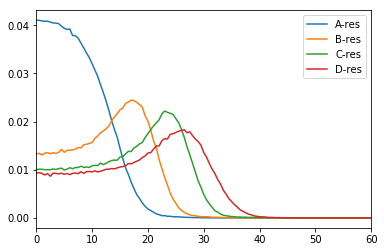

In [69]:
Wdens = LinearDensity(w, binsize=0.5, start=100, stop=1000)
Wdens.run()
Adens = LinearDensity(AAA, binsize=0.5, start=100, stop=1000)
Adens.run()
Bdens = LinearDensity(BBB, binsize=0.5, start=100, stop=1000)
Bdens.run()
Cdens = LinearDensity(CCC, binsize=0.5, start=100, stop=1000)
Cdens.run()
Ddens = LinearDensity(DDD, binsize=0.5, start=100, stop=1000)
Ddens.run()

Adens_xy = 0.5*(Adens.results['x']['pos']+ Adens.results['y']['pos'])
Bdens_xy = 0.5*(Bdens.results['x']['pos']+ Bdens.results['y']['pos'])
Cdens_xy = 0.5*(Cdens.results['x']['pos']+ Cdens.results['y']['pos'])
Ddens_xy = 0.5*(Ddens.results['x']['pos']+ Ddens.results['y']['pos'])
Wdens_xy = 0.5*(Wdens.results['x']['pos']+ Wdens.results['y']['pos'])

x=np.arange(0,AAA.dimensions[1], 0.5)
fig, ax = plt.subplots()
ax.plot(x, Adens_xy, label='A-res')
ax.plot(x, Bdens_xy, label='B-res')
ax.plot(x, Cdens_xy, label='C-res')
ax.plot(x, Ddens_xy, label='D-res')
#ax.plot(x, Wdens_xy, label='water')
plt.legend()
plt.xlim([0,60])
plt.show()

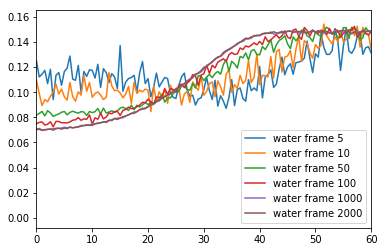

In [72]:
Wdens1 = LinearDensity(w, binsize=0.5, start=0, stop=5)
Wdens1.run()
Wdens2 = LinearDensity(w, binsize=0.5, start=5, stop=10)
Wdens2.run()
Wdens3 = LinearDensity(w, binsize=0.5, start=10, stop=50)
Wdens3.run()
Wdens4 = LinearDensity(w, binsize=0.5, start=50, stop=100)
Wdens4.run()
Wdens5 = LinearDensity(w, binsize=0.5, start=100, stop=1000)
Wdens5.run()
Wdens6 = LinearDensity(w, binsize=0.5, start=1000, stop=2000)
Wdens6.run()

Wdens1_xy = 0.5*(Wdens1.results['x']['pos']+ Wdens1.results['y']['pos'])
Wdens2_xy = 0.5*(Wdens2.results['x']['pos']+ Wdens2.results['y']['pos'])
Wdens3_xy = 0.5*(Wdens3.results['x']['pos']+ Wdens3.results['y']['pos'])
Wdens4_xy = 0.5*(Wdens4.results['x']['pos']+ Wdens4.results['y']['pos'])
Wdens5_xy = 0.5*(Wdens5.results['x']['pos']+ Wdens5.results['y']['pos'])
Wdens6_xy = 0.5*(Wdens6.results['x']['pos']+ Wdens6.results['y']['pos'])

fig, ax = plt.subplots()
ax.plot(x, Wdens1_xy, label='water frame 5')
ax.plot(x, Wdens2_xy, label='water frame 10')
ax.plot(x, Wdens3_xy, label='water frame 50')
ax.plot(x, Wdens4_xy, label='water frame 100')
ax.plot(x, Wdens5_xy, label='water frame 1000')
ax.plot(x, Wdens6_xy, label='water frame 2000')

plt.legend()
plt.xlim([0,60])
plt.show()


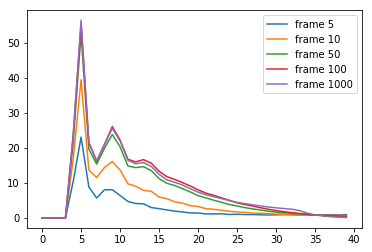

In [57]:
T4=AAA.atoms.select_atoms("name T4")
A_rdf1=rdf.InterRDF(T4, T4, range=(0,40), nbins=40, exclusion_block=(1,1), start=0, stop=5)
A_rdf2=rdf.InterRDF(T4, T4, range=(0,40), nbins=40, exclusion_block=(1,1), start=5, stop=10)
A_rdf3=rdf.InterRDF(T4, T4, range=(0,40), nbins=40, exclusion_block=(1,1), start=10, stop=50)
A_rdf4=rdf.InterRDF(T4, T4, range=(0,40), nbins=40, exclusion_block=(1,1), start=50, stop=100)
A_rdf5=rdf.InterRDF(T4, T4, range=(0,40), nbins=40, exclusion_block=(1,1), start=100, stop=1000)

A_rdf1.run()
A_rdf2.run()
A_rdf3.run()
A_rdf4.run()
A_rdf5.run()
fig, ax = plt.subplots()
ax.plot(A_rdf1.rdf, label='frame 5')
ax.plot(A_rdf2.rdf, label='frame 10')
ax.plot(A_rdf3.rdf, label='frame 50')
ax.plot(A_rdf4.rdf, label='frame 100')
ax.plot(A_rdf5.rdf, label='frame 1000')
plt.legend()
plt.show()

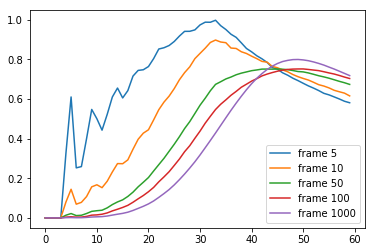

In [63]:
Aw_rdf1=rdf.InterRDF(T4, w, range=(0,60), nbins=60, start=0, stop=5)
Aw_rdf2=rdf.InterRDF(T4, w, range=(0,60), nbins=60, exclusion_block=(1,1), start=5, stop=10)
Aw_rdf3=rdf.InterRDF(T4, w, range=(0,60), nbins=60, exclusion_block=(1,1), start=10, stop=50)
Aw_rdf4=rdf.InterRDF(T4, w, range=(0,60), nbins=60, exclusion_block=(1,1), start=50, stop=100)
Aw_rdf5=rdf.InterRDF(T4, w, range=(0,60), nbins=60, exclusion_block=(1,1), start=100, stop=1000)

Aw_rdf1.run()
Aw_rdf2.run()
Aw_rdf3.run()
Aw_rdf4.run()
Aw_rdf5.run()
fig, ax = plt.subplots()
ax.plot(Aw_rdf1.rdf, label='frame 5')
ax.plot(Aw_rdf2.rdf, label='frame 10')
ax.plot(Aw_rdf3.rdf, label='frame 50')
ax.plot(Aw_rdf4.rdf, label='frame 100')
ax.plot(Aw_rdf5.rdf, label='frame 1000')
plt.legend()
plt.show()

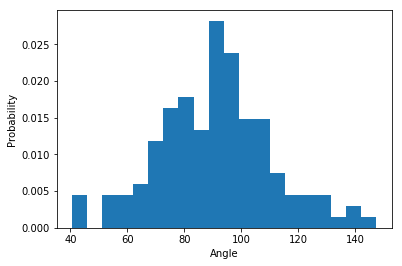

In [306]:
#Determine the orientation of each chain wrt to the long axis of fiber

#Use the fit_angle script written by Justin Gullingsrud (justin@ks.uiuc.edu)
#https://www.ks.uiuc.edu/Research/vmd/script_library/scripts/fit_angle/

def lsq(x):
    N = len(x)
    xtot=0
    d=0.5*(N-1)
    for i in range(N):
        xtot += (i-d)*x[i]
    return xtot

#Calculate the angle for the last frame of trajectory.
#Can we loop through the trajectory?
u.trajectory[2220]
angle = []
vec = [0, 0, 1]
#get the average x,y,z coordinates of all chains
for f in poly.atoms.fragments:
    x = f.atoms.positions.T[0]
    y = f.atoms.positions.T[1]
    z = f.atoms.positions.T[2]
    xa = lsq(x)
    ya = lsq(y)
    za = lsq(z)
    anorm = math.sqrt(xa*xa + ya*ya + za*za)
    xa /= anorm  
    ya /= anorm  
    za /= anorm 
    costheta = xa*vec[0] + ya*vec[1] + za*vec[2]
    angle.append(180 * math.acos(costheta) / math.pi)
plt.hist(angle, normed=True, bins=20)
plt.ylabel('Probability')
plt.xlabel('Angle')
plt.show()



In [307]:
# Calculate eccentricity using moment of inertia
mom_i = poly.moment_of_inertia()
w, v = LA.eig(mom_i)
idx = w.argsort()[::-1]   
w = w[idx]
w
#w[0] is along the long axis of fiber (z-axis), w[1] and w[2] are along x and y
eccentricity = np.sqrt(1-w[2]/w[1])
eccentricity

0.4340584063938183